.

.

.

.

.

.

.

.

# <center>Hi!</center>

.

.

.

.

.

.

.

.

# List Comprehensions in Python: the How, the Why, and the What Even Are They?

# Contents

- [What is a list comprehension?](#)
- [Why use them?]
- [with conditional statements (if/else]
- [with nesting]
- [Dictionary comprehensions]


## What is a list comprehension?

### A list:

In [7]:
allergens = ['fish', 'peanuts', 'wheat', 'shellfish', 'tree nuts', 'eggs', 'milk', 'soy']


In [ ]:
dishes = ['baked cod', 'pad thai', 'sandwich', 
          'fideos', 'beet hazelnut salad', 
          'frittata', 'cheese plate', 'fried tofu']

In [3]:
sorted_allergens = sorted(allergens)

In [4]:
sorted_allergens

['eggs', 'fish', 'milk', 'peanuts', 'shellfish', 'soy', 'tree nuts', 'wheat']

In [8]:
for a, d in zip(allergens, dishes): 
    
    print(f'Watch out, {d} contains {a}!')

Watch out, baked cod contains fish!
Watch out, pad thai contains peanuts!
Watch out, sandwich contains wheat!
Watch out, fideos contains shellfish!
Watch out, beet hazelnut salad contains tree nuts!
Watch out, frittata contains eggs!
Watch out, cheese plate contains milk!
Watch out, fried tofu contains soy!


#### 'I like that, can you send me a list of the allergens with an example for each of a dish containing the allergen?'

In [61]:
allergen_examples = []

for a, d in zip(allergens, dishes):
    example_tuple = (a, d)
    allergen_examples.append(example_tuple)

allergen_examples

[('fish', 'baked cod'),
 ('peanuts', 'pad thai'),
 ('wheat', 'sandwich'),
 ('shellfish', 'fideos'),
 ('tree nuts', 'beet hazelnut salad'),
 ('eggs', 'frittata'),
 ('milk', 'cheese plate'),
 ('soy', 'fried tofu')]

In [63]:
#Or, by index:
allergen_examples = []

#Don't do this:
#for i in range(allergens):
    
for i, a in enumerate(allergens):
    example_tuple = (allergens[i], dishes[i])
    allergen_examples.append(example_tuple)

allergen_examples

[('fish', 'baked cod'),
 ('peanuts', 'pad thai'),
 ('wheat', 'sandwich'),
 ('shellfish', 'fideos'),
 ('tree nuts', 'beet hazelnut salad'),
 ('eggs', 'frittata'),
 ('milk', 'cheese plate'),
 ('soy', 'fried tofu')]

In [64]:
#Or just:

list(zip(allergens, dishes))

[('fish', 'baked cod'),
 ('peanuts', 'pad thai'),
 ('wheat', 'sandwich'),
 ('shellfish', 'fideos'),
 ('tree nuts', 'beet hazelnut salad'),
 ('eggs', 'frittata'),
 ('milk', 'cheese plate'),
 ('soy', 'fried tofu')]

In [18]:
#Kind of clunky
allergen_examples[0]

('fish', 'baked cod')

In [19]:
allergen_examples[0][0]

'fish'

In [20]:
#Better: 

allergen_examples = {}

for a, d in zip(allergens, dishes):
    allergen_examples[a] = d
    
allergen_examples

{'fish': 'baked cod',
 'peanuts': 'pad thai',
 'wheat': 'sandwich',
 'shellfish': 'fideos',
 'tree nuts': 'beet hazelnut salad',
 'eggs': 'frittata',
 'milk': 'cheese plate',
 'soy': 'fried tofu'}

In [21]:
#Nice
allergen_examples['fish']

'baked cod'

### With a list comprehension:

In [67]:
allergens

['fish', 'peanuts', 'wheat', 'shellfish', 'tree nuts', 'eggs', 'milk', 'soy']

In [70]:
for a in allergens: #For each thing in some collection of things
    print(a.upper()) #Do something

FISH
PEANUTS
WHEAT
SHELLFISH
TREE NUTS
EGGS
MILK
SOY


In [68]:
[a.upper() for a in allergens] #All the action inside the brackets

['FISH', 'PEANUTS', 'WHEAT', 'SHELLFISH', 'TREE NUTS', 'EGGS', 'MILK', 'SOY']

In [71]:
# allergen_examples = []
# for a, d in zip(allergens, dishes):
#     example_tuple = (a, d)
#     allergen_examples.append(example_tuple)

allergen_examples = [(d + ' has ' + a) for a, d in zip(allergens, dishes)]
allergen_examples

['baked cod has fish',
 'pad thai has peanuts',
 'sandwich has wheat',
 'fideos has shellfish',
 'beet hazelnut salad has tree nuts',
 'frittata has eggs',
 'cheese plate has milk',
 'fried tofu has soy']

In [72]:
allergen_examples[0]

'baked cod has fish'

### With a dictionary comprehension:

In [11]:
# allergen_examples = {}
# for a, d in zip(allergens, dishes):
#     allergen_examples[a] = d

allergen_examples= {a: d for a, d in zip(allergens, dishes)} #All the action inside the brackets
allergen_examples

{'fish': 'baked cod',
 'peanuts': 'pad thai',
 'wheat': 'sandwich',
 'shellfish': 'fideos',
 'tree nuts': 'beet hazelnut salad',
 'eggs': 'frittata',
 'milk': 'cheese plate',
 'soy': 'fried tofu'}

In [73]:
allergen_examples = {a: dishes[i] for i, a in enumerate(allergens)}
allergen_examples

{'fish': 'baked cod',
 'peanuts': 'pad thai',
 'wheat': 'sandwich',
 'shellfish': 'fideos',
 'tree nuts': 'beet hazelnut salad',
 'eggs': 'frittata',
 'milk': 'cheese plate',
 'soy': 'fried tofu'}

## Why tho ???
### Speed of computation

## Nesting

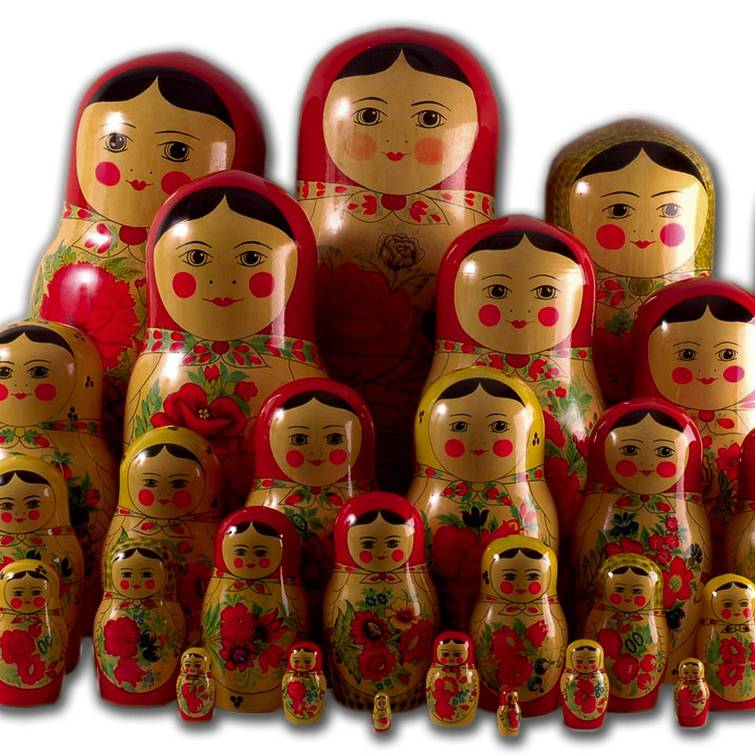

## Two counter-intuitive things:
1. Smallest to biggest, then descending order
2. 'if' at the end; 'if else' at the beginning

### A menu for a wedding

In [75]:
menu = [
            [
                [
                    'tomato bisque', 'potato leek', 'french onion'
                ],
                [
                    'broccoli cheddar', 'gaspacho', 'minestrone'
                ],
                [
                    'carrot ginger', 'curried sweet potato', 'mulligatawny',
                ]
            ],
            [
                [
                    'caesar', 'cobb', 'nicoise'
                ],
                [
                    'larb', 'cole slaw', 'watermelon tomato'
                ],
                [
                    'mesclun', 'kale', 'lentil'
                ]
            ],
            [
               [
                    'steak au poivre', 'grilled chicken', 'salmon with dill'
                ],
                [
                    '', '', ''
                ],
               [
                    'falafel', 'cauliflower steak', 'grilled portobello'
                ]
            ],
            [
                [
                    'mashed potatoes', 'fried brussels sprouts', 'garlic bread'
                ],
                [
                    'grilled asparagus', 'roasted tomatoes', 'green beans amandine'
                ],
                [
                    'boiled new potatoes', 'curried cauliflower', 'farro salad'
                ]
            ],
            [
                [
                    'black forest cake', 'lemon bars', 'choux puffs'
                ],
                [
                    'flourless chocolate cake', 'parfaits', 'macarons'
                ],
                [
                    'sweet potato cake', 'peanut butter cookies', 'fruit salad'
                ]
            ],
        ]

In [76]:
menu

[[['tomato bisque', 'potato leek', 'french onion'],
  ['broccoli cheddar', 'gaspacho', 'minestrone'],
  ['carrot ginger', 'curried sweet potato', 'mulligatawny']],
 [['caesar', 'cobb', 'nicoise'],
  ['larb', 'cole slaw', 'watermelon tomato'],
  ['mesclun', 'kale', 'lentil']],
 [['steak au poivre', 'grilled chicken', 'salmon with dill'],
  ['', '', ''],
  ['falafel', 'cauliflower steak', 'grilled portobello']],
 [['mashed potatoes', 'fried brussels sprouts', 'garlic bread'],
  ['grilled asparagus', 'roasted tomatoes', 'green beans amandine'],
  ['boiled new potatoes', 'curried cauliflower', 'farro salad']],
 [['black forest cake', 'lemon bars', 'choux puffs'],
  ['flourless chocolate cake', 'parfaits', 'macarons'],
  ['sweet potato cake', 'peanut butter cookies', 'fruit salad']]]

In [77]:
courses = ['soup', 'salad', 'main', 'sides', 'dessert']

In [78]:
styles = ['classic', 'gluten free', 'vegan']

### Flatten the nested structure

In [79]:
#Big for big in list
[course for course in menu]

[[['tomato bisque', 'potato leek', 'french onion'],
  ['broccoli cheddar', 'gaspacho', 'minestrone'],
  ['carrot ginger', 'curried sweet potato', 'mulligatawny']],
 [['caesar', 'cobb', 'nicoise'],
  ['larb', 'cole slaw', 'watermelon tomato'],
  ['mesclun', 'kale', 'lentil']],
 [['steak au poivre', 'grilled chicken', 'salmon with dill'],
  ['', '', ''],
  ['falafel', 'cauliflower steak', 'grilled portobello']],
 [['mashed potatoes', 'fried brussels sprouts', 'garlic bread'],
  ['grilled asparagus', 'roasted tomatoes', 'green beans amandine'],
  ['boiled new potatoes', 'curried cauliflower', 'farro salad']],
 [['black forest cake', 'lemon bars', 'choux puffs'],
  ['flourless chocolate cake', 'parfaits', 'macarons'],
  ['sweet potato cake', 'peanut butter cookies', 'fruit salad']]]

In [80]:
#Medium for big in LIST for medium in big
[style for course in menu for style in course]

[['tomato bisque', 'potato leek', 'french onion'],
 ['broccoli cheddar', 'gaspacho', 'minestrone'],
 ['carrot ginger', 'curried sweet potato', 'mulligatawny'],
 ['caesar', 'cobb', 'nicoise'],
 ['larb', 'cole slaw', 'watermelon tomato'],
 ['mesclun', 'kale', 'lentil'],
 ['steak au poivre', 'grilled chicken', 'salmon with dill'],
 ['', '', ''],
 ['falafel', 'cauliflower steak', 'grilled portobello'],
 ['mashed potatoes', 'fried brussels sprouts', 'garlic bread'],
 ['grilled asparagus', 'roasted tomatoes', 'green beans amandine'],
 ['boiled new potatoes', 'curried cauliflower', 'farro salad'],
 ['black forest cake', 'lemon bars', 'choux puffs'],
 ['flourless chocolate cake', 'parfaits', 'macarons'],
 ['sweet potato cake', 'peanut butter cookies', 'fruit salad']]

In [91]:
#Small for big in LIST for medium in big for small in medium
[food for course in menu for style in course for food in style]

['tomato bisque',
 'potato leek',
 'french onion',
 'broccoli cheddar',
 'gaspacho',
 'minestrone',
 'carrot ginger',
 'curried sweet potato',
 'mulligatawny',
 'caesar',
 'cobb',
 'nicoise',
 'larb',
 'cole slaw',
 'watermelon tomato',
 'mesclun',
 'kale',
 'lentil',
 'steak au poivre',
 'grilled chicken',
 'salmon with dill',
 '',
 '',
 '',
 'falafel',
 'cauliflower steak',
 'grilled portobello',
 'mashed potatoes',
 'fried brussels sprouts',
 'garlic bread',
 'grilled asparagus',
 'roasted tomatoes',
 'green beans amandine',
 'boiled new potatoes',
 'curried cauliflower',
 'farro salad',
 'black forest cake',
 'lemon bars',
 'choux puffs',
 'flourless chocolate cake',
 'parfaits',
 'macarons',
 'sweet potato cake',
 'peanut butter cookies',
 'fruit salad']

In [82]:
#With if statement (must be at the end)
[food for course in menu for style in course for food in style if food]

['tomato bisque',
 'potato leek',
 'french onion',
 'broccoli cheddar',
 'gaspacho',
 'minestrone',
 'carrot ginger',
 'curried sweet potato',
 'mulligatawny',
 'caesar',
 'cobb',
 'nicoise',
 'larb',
 'cole slaw',
 'watermelon tomato',
 'mesclun',
 'kale',
 'lentil',
 'steak au poivre',
 'grilled chicken',
 'salmon with dill',
 'falafel',
 'cauliflower steak',
 'grilled portobello',
 'mashed potatoes',
 'fried brussels sprouts',
 'garlic bread',
 'grilled asparagus',
 'roasted tomatoes',
 'green beans amandine',
 'boiled new potatoes',
 'curried cauliflower',
 'farro salad',
 'black forest cake',
 'lemon bars',
 'choux puffs',
 'flourless chocolate cake',
 'parfaits',
 'macarons',
 'sweet potato cake',
 'peanut butter cookies',
 'fruit salad']

In [83]:
#With if/else statement (must be at the beginning)
[food if food else 'Not available' for course in menu for style in course for food in style]

['tomato bisque',
 'potato leek',
 'french onion',
 'broccoli cheddar',
 'gaspacho',
 'minestrone',
 'carrot ginger',
 'curried sweet potato',
 'mulligatawny',
 'caesar',
 'cobb',
 'nicoise',
 'larb',
 'cole slaw',
 'watermelon tomato',
 'mesclun',
 'kale',
 'lentil',
 'steak au poivre',
 'grilled chicken',
 'salmon with dill',
 'Not available',
 'Not available',
 'Not available',
 'falafel',
 'cauliflower steak',
 'grilled portobello',
 'mashed potatoes',
 'fried brussels sprouts',
 'garlic bread',
 'grilled asparagus',
 'roasted tomatoes',
 'green beans amandine',
 'boiled new potatoes',
 'curried cauliflower',
 'farro salad',
 'black forest cake',
 'lemon bars',
 'choux puffs',
 'flourless chocolate cake',
 'parfaits',
 'macarons',
 'sweet potato cake',
 'peanut butter cookies',
 'fruit salad']

### Need a nested dictionary with courses and styles

In [89]:
#Biggest:
courses

['soup', 'salad', 'main', 'sides', 'dessert']

In [90]:
#Medium:
styles

['classic', 'gluten free', 'vegan']

In [97]:
{course: {} for i, course in enumerate(courses)}

{'soup': {}, 'salad': {}, 'main': {}, 'sides': {}, 'dessert': {}}

In [98]:
{course: {style: () for j, style in enumerate(styles)} for i, course in enumerate(courses)}

{'soup': {'classic': (), 'gluten free': (), 'vegan': ()},
 'salad': {'classic': (), 'gluten free': (), 'vegan': ()},
 'main': {'classic': (), 'gluten free': (), 'vegan': ()},
 'sides': {'classic': (), 'gluten free': (), 'vegan': ()},
 'dessert': {'classic': (), 'gluten free': (), 'vegan': ()}}

#### Using the indices

In [95]:
{course: {style: (i,j) for j, style in enumerate(styles)} for i, course in enumerate(courses)}

{'soup': {'classic': (0, 0), 'gluten free': (0, 1), 'vegan': (0, 2)},
 'salad': {'classic': (1, 0), 'gluten free': (1, 1), 'vegan': (1, 2)},
 'main': {'classic': (2, 0), 'gluten free': (2, 1), 'vegan': (2, 2)},
 'sides': {'classic': (3, 0), 'gluten free': (3, 1), 'vegan': (3, 2)},
 'dessert': {'classic': (4, 0), 'gluten free': (4, 1), 'vegan': (4, 2)}}

In [105]:
#Our original menu
menu

[[['tomato bisque', 'potato leek', 'french onion'],
  ['broccoli cheddar', 'gaspacho', 'minestrone'],
  ['carrot ginger', 'curried sweet potato', 'mulligatawny']],
 [['caesar', 'cobb', 'nicoise'],
  ['larb', 'cole slaw', 'watermelon tomato'],
  ['mesclun', 'kale', 'lentil']],
 [['steak au poivre', 'grilled chicken', 'salmon with dill'],
  ['', '', ''],
  ['falafel', 'cauliflower steak', 'grilled portobello']],
 [['mashed potatoes', 'fried brussels sprouts', 'garlic bread'],
  ['grilled asparagus', 'roasted tomatoes', 'green beans amandine'],
  ['boiled new potatoes', 'curried cauliflower', 'farro salad']],
 [['black forest cake', 'lemon bars', 'choux puffs'],
  ['flourless chocolate cake', 'parfaits', 'macarons'],
  ['sweet potato cake', 'peanut butter cookies', 'fruit salad']]]

In [103]:
#Using these indices to find foods on our menu
menu[0][2]

['carrot ginger', 'curried sweet potato', 'mulligatawny']

#### Putting it all together

In [84]:
{course: {style: [food for food in menu[i][j]] for j, style in enumerate(styles)} for i, course in enumerate(courses)}

{'soup': {'classic': ['tomato bisque', 'potato leek', 'french onion'],
  'gluten free': ['broccoli cheddar', 'gaspacho', 'minestrone'],
  'vegan': ['carrot ginger', 'curried sweet potato', 'mulligatawny']},
 'salad': {'classic': ['caesar', 'cobb', 'nicoise'],
  'gluten free': ['larb', 'cole slaw', 'watermelon tomato'],
  'vegan': ['mesclun', 'kale', 'lentil']},
 'main': {'classic': ['steak au poivre',
   'grilled chicken',
   'salmon with dill'],
  'gluten free': ['', '', ''],
  'vegan': ['falafel', 'cauliflower steak', 'grilled portobello']},
 'sides': {'classic': ['mashed potatoes',
   'fried brussels sprouts',
   'garlic bread'],
  'gluten free': ['grilled asparagus',
   'roasted tomatoes',
   'green beans amandine'],
  'vegan': ['boiled new potatoes', 'curried cauliflower', 'farro salad']},
 'dessert': {'classic': ['black forest cake', 'lemon bars', 'choux puffs'],
  'gluten free': ['flourless chocolate cake', 'parfaits', 'macarons'],
  'vegan': ['sweet potato cake', 'peanut butter

In [106]:
menu = {
        'soup': {
                    'classic': [
                                'tomato bisque', 'potato leek', 'french onion'
                                ],
                    'gluten_free': [
                                'broccoli cheddar', 'gaspacho', 'minestrone'
                                ],
                    'vegan': [
                                'carrot ginger', 'curried sweet potato', 'mulligatawny',
                                ]
                },
        'salad': {
                    'classic': [
                                'caesar', 'cobb', 'nicoise'
                                ],
                    'gluten_free': [
                                'larb', 'cole slaw', 'watermelon tomato'
                                ],
                    'vegan': [
                                'mesclun', 'kale', 'lentil'
                                ]
                },
        'proteins': {
                    'classic': [
                                'steak au poivre', 'grilled chicken', 'salmon with dill'
                                ],
                    'gluten_free': [
                                '', '', ''
                                ],
                    'vegan': [
                                'falafel', 'cauliflower steak', 'grilled portobello'
                                ]
                },
        'sides': {
                    'classic': [
                                'mashed potatoes', 'fried brussels sprouts', 'garlic bread'
                                ],
                    'gluten_free': [
                                 'grilled asparagus', 'roasted tomatoes', 'green beans amandine'
                                ],
                    'vegan': ['boiled new potatoes', 'curried cauliflower', 'farro salad']
                },
        'pastry': {
                    'classic': [
                                'black forest cake', 'lemon bars', 'choux puffs'
                                ],
                    'gluten_free': [
                                'flourless chocolate cake', 'parfaits', 'macarons'
                                ],
                    'vegan': [
                                'sweet potato cake', 'peanut butter cookies', 'fruit salad'
                                
                    ]
                },
}

In [6]:
menu

{'soup': {'classic': ['tomato bisque', 'potato leek', 'french onion'],
  'gluten_free': ['broccoli cheddar', 'gaspacho', 'pho'],
  'vegan': ['carrot ginger', 'curried sweet potato', 'mulligatawny']},
 'salad': {'classic': ['caesar', 'cobb', 'nicoise'],
  'gluten_free': ['larb', 'cole slaw', 'watermelon tomato'],
  'vegan': ['mesclun', 'kale', 'lentil']},
 'proteins': {'classic': ['steak au poivre',
   'grilled chicken',
   'salmon with dill'],
  'gluten_free': ['', '', ''],
  'vegan': ['falafel', 'cauliflower steak', 'grilled portobello']},
 'sides': {'classic': ['mashed potatoes', 'fried brussels sprouts'],
  'gluten_free': ['grilled asparagus'],
  'vegan': ['boiled new potatoes', '', '']},
 'pastry': {'classic': [], 'gluten_free': [], 'vegan': []}}

In [38]:
for course, c_options in menu.items():
    print(course.upper())
    for style, s_options in c_options.items():
        print(f'{style}:')
        for food in s_options:
            print(food)
        print('\n')
    print('\n')

SOUP
classic:
tomato bisque
potato leek
french onion


gluten_free:
broccoli cheddar
gaspacho
minestrone


vegan:
carrot ginger
curried sweet potato
mulligatawny




SALAD
classic:
caesar
cobb
nicoise


gluten_free:
larb
cole slaw
watermelon tomato


vegan:
mesclun
kale
lentil




PROTEINS
classic:
steak au poivre
grilled chicken
salmon with dill


gluten_free:





vegan:
falafel
cauliflower steak
grilled portobello




SIDES
classic:
mashed potatoes
fried brussels sprouts
garlic bread


gluten_free:
grilled asparagus
roasted tomatoes
green beans amandine


vegan:
boiled new potatoes
curried cauliflower
farro salad




PASTRY
classic:
black forest cake
lemon bars
choux puffs


gluten_free:
flourless chocolate cake
parfaits
macarons


vegan:
sweet potato cake
peanut butter cookies
fruit salad






### Need a list of all the food options

In [41]:
food_options = []
for course, c_options in menu.items():
    for style, s_options in c_options.items():
        for food in s_options:
           # if food:
            food_options.append(food)

food_options

['tomato bisque',
 'potato leek',
 'french onion',
 'broccoli cheddar',
 'gaspacho',
 'minestrone',
 'carrot ginger',
 'curried sweet potato',
 'mulligatawny',
 'caesar',
 'cobb',
 'nicoise',
 'larb',
 'cole slaw',
 'watermelon tomato',
 'mesclun',
 'kale',
 'lentil',
 'steak au poivre',
 'grilled chicken',
 'salmon with dill',
 '',
 '',
 '',
 'falafel',
 'cauliflower steak',
 'grilled portobello',
 'mashed potatoes',
 'fried brussels sprouts',
 'garlic bread',
 'grilled asparagus',
 'roasted tomatoes',
 'green beans amandine',
 'boiled new potatoes',
 'curried cauliflower',
 'farro salad',
 'black forest cake',
 'lemon bars',
 'choux puffs',
 'flourless chocolate cake',
 'parfaits',
 'macarons',
 'sweet potato cake',
 'peanut butter cookies',
 'fruit salad']

In [28]:
[c for c, c_options in menu.items()]

['soup', 'salad', 'proteins', 'sides', 'pastry']

In [42]:
[s for c, c_options in menu.items() for s, s_options in c_options.items()]

['classic',
 'gluten_free',
 'vegan',
 'classic',
 'gluten_free',
 'vegan',
 'classic',
 'gluten_free',
 'vegan',
 'classic',
 'gluten_free',
 'vegan',
 'classic',
 'gluten_free',
 'vegan']

In [74]:
#COURSE: options > style: options > food options
#smallest for 2nd-biggest in biggest #for 3rd-biggest in 2nd-biggest #for smallest in 3rd-biggest
#if something
[f for c, c_options in menu.items() for s, s_options in c_options.items() for f in s_options if f]                                                             

['tomato bisque',
 'potato leek',
 'french onion',
 'broccoli cheddar',
 'gaspacho',
 'minestrone',
 'carrot ginger',
 'curried sweet potato',
 'mulligatawny',
 'caesar',
 'cobb',
 'nicoise',
 'larb',
 'cole slaw',
 'watermelon tomato',
 'mesclun',
 'kale',
 'lentil',
 'steak au poivre',
 'grilled chicken',
 'salmon with dill',
 'falafel',
 'cauliflower steak',
 'grilled portobello',
 'mashed potatoes',
 'fried brussels sprouts',
 'garlic bread',
 'grilled asparagus',
 'roasted tomatoes',
 'green beans amandine',
 'boiled new potatoes',
 'curried cauliflower',
 'farro salad',
 'black forest cake',
 'lemon bars',
 'choux puffs',
 'flourless chocolate cake',
 'parfaits',
 'macarons',
 'sweet potato cake',
 'peanut butter cookies',
 'fruit salad']

### Need all the gluten free options 

In [52]:
gluten_free_options = {c: [] for c, c_options in menu.items()}

In [53]:
gluten_free_options

{'soup': [], 'salad': [], 'proteins': [], 'sides': [], 'pastry': []}

In [58]:
#Wrong
gluten_free_options = {c: [f for f in s_options] for c, c_options in menu.items() for s, s_options in c_options.items()}
gluten_free_options

{'soup': ['carrot ginger', 'curried sweet potato', 'mulligatawny'],
 'salad': ['mesclun', 'kale', 'lentil'],
 'proteins': ['falafel', 'cauliflower steak', 'grilled portobello'],
 'sides': ['boiled new potatoes', 'curried cauliflower', 'farro salad'],
 'pastry': ['sweet potato cake', 'peanut butter cookies', 'fruit salad']}

In [55]:
gluten_free_options = {c: [f for f in s_options] for c, c_options in menu.items() for s, s_options in c_options.items() if s == 'gluten_free'}

In [56]:
#Correct
gluten_free_options

{'soup': ['broccoli cheddar', 'gaspacho', 'minestrone'],
 'salad': ['larb', 'cole slaw', 'watermelon tomato'],
 'proteins': ['', '', ''],
 'sides': ['grilled asparagus', 'roasted tomatoes', 'green beans amandine'],
 'pastry': ['flourless chocolate cake', 'parfaits', 'macarons']}

In [1]:
import numpy as np

In [8]:
thousand = np.arange(1000)

In [10]:
%time
thousand_and_one = []
for i in thousand:
    thousand_and_one.append(i + 1)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


In [14]:
%time
billion = np.arange(1000000000)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


In [17]:
def add_to_billion(billion):
    billion_and_one = []
    for i in billion:
        billion_and_one.append(i + 1)
    return billion_and_one

In [19]:
import time
start = time.time()
billion_and_one = add_to_billion(billion)
end = time.time()
print((end - start) / 60)

385.1903643608093


In [20]:
(end - start) / 60

6.419839406013489

In [21]:
start = time.time()
billion_and_one = [i + 1 for i in billion]
end = time.time()
print((end - start) / 60)

5.630552645524343


In [22]:
start = time.time()
billion_and_one = billion + 1
end = time.time()
print((end - start) / 60)

1.640518565972646


In [23]:
million = []
start = time.time()
for i in np.arange(1000000):
    million.append(str(i))
end = time.time()
print((end - start) / 60)

0.010595166683197021


In [25]:
million_hey = []
start = time.time()
for i in million:
    million_hey.append(i + '!')
end = time.time()
print((end - start) / 60)

0.0029339989026387534


In [28]:
billion = []
start = time.time()
for i in np.arange(1000000000):
    billion.append(str(i))
end = time.time()
print((end - start) / 60)

12.019638164838154


In [ ]:
billion_hey = []
start = time.time()
for i in billion:
    billion_hey.append(i + '!')
end = time.time()
print((end - start) / 60)

In [ ]:
start = time.time()
billion_ho = [i + ' say whaaat?' for i in billion]
end = time.time()
print((end - start) / 60)